In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [5]:
df = pd.read_csv("../data/StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df["average_score"] = (
    df["math score"] + df["reading score"] + df["writing score"]
) / 3

df["Result"] = df["average_score"].apply(lambda x: "Pass" if x >= 40 else "Fail")

df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,Result
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Pass
1,female,group C,some college,standard,completed,69,90,88,82.333333,Pass
2,female,group B,master's degree,standard,none,90,95,93,92.666667,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,Pass
4,male,group C,some college,standard,none,76,78,75,76.333333,Pass


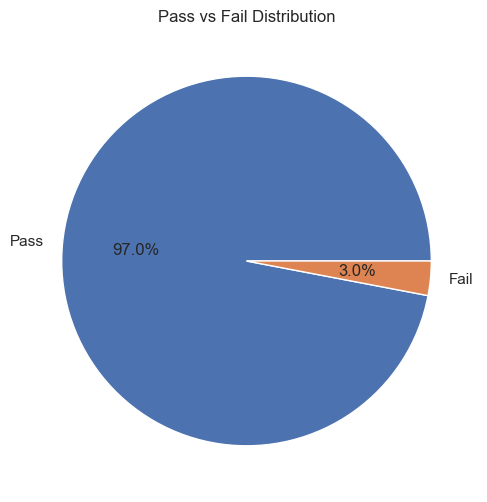

In [10]:
df["Result"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    figsize=(6,6),
    title="Pass vs Fail Distribution"
)
plt.ylabel("")
plt.show()


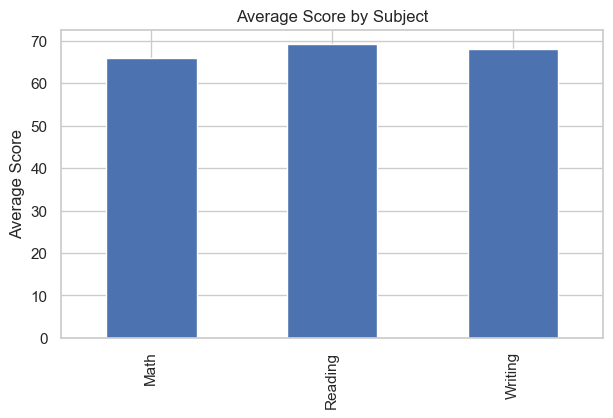

In [11]:
subject_avg = {
    "Math": df["math score"].mean(),
    "Reading": df["reading score"].mean(),
    "Writing": df["writing score"].mean()
}

pd.Series(subject_avg).plot(
    kind="bar",
    figsize=(7,4),
    title="Average Score by Subject"
)
plt.ylabel("Average Score")
plt.show()


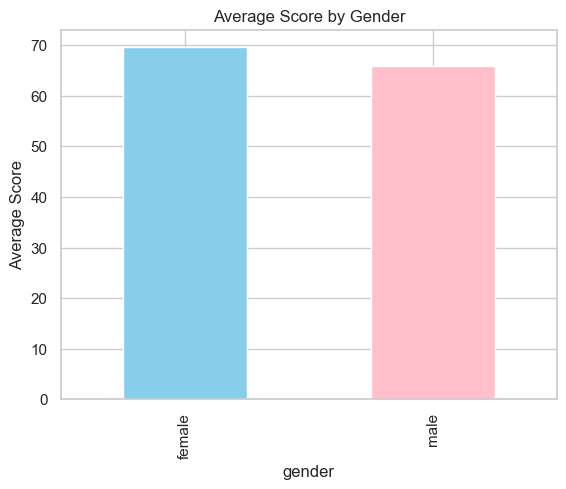

In [12]:
gender_avg = df.groupby("gender")["average_score"].mean()

gender_avg.plot(
    kind="bar",
    color=["skyblue", "pink"],
    title="Average Score by Gender"
)
plt.ylabel("Average Score")
plt.show()


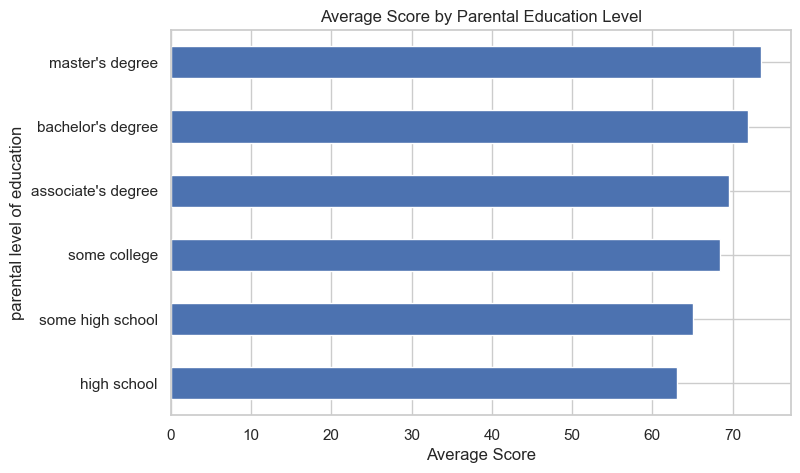

In [13]:
edu_avg = df.groupby("parental level of education")["average_score"].mean().sort_values()

edu_avg.plot(
    kind="barh",
    figsize=(8,5),
    title="Average Score by Parental Education Level"
)
plt.xlabel("Average Score")
plt.show()


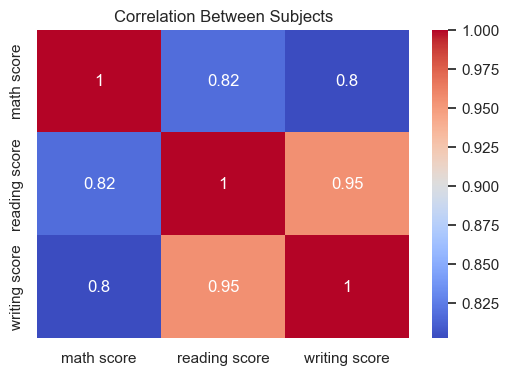

In [14]:
plt.figure(figsize=(6,4))
sns.heatmap(
    df[["math score", "reading score", "writing score"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Between Subjects")
plt.show()
